In [23]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from env import api_key
import requests
import json
from acquire import *
from bs4 import BeautifulSoup
import os
import re
from prepare import *
import IPython
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler

In [24]:
df = pd.read_csv("master_df.csv")

In [25]:
df = prepare_bills_for_processing(df)

In [26]:
df['lem'] = df.bill_text.apply(clean_text)

In [27]:
df['model'] = df.lem.apply(join)

In [99]:
df.head()

,sponsor,party,bill_text,lem,model
0,"Torres Small, Xochitl",D,\n\n\n \n To require the Secretary of Homelan...,"[require, homeland, security, develop, plan, i...",require homeland security develop plan increas...
1,"Sewell, Terri A.",D,\n\n\n \nTo amend title XI of the Social Secur...,"[amend, xi, social, security, clarify, paramet...",amend xi social security clarify parameter mod...
2,"Finkenauer, Abby",D,\n\n\n \n To repeal the funding authorization ...,"[repeal, funding, sunset, total, funding, cap,...",repeal funding sunset total funding cap americ...
3,"Casten, Sean",D,\n\n\n \nTo direct the Federal Energy Regulato...,"[direct, federal, energy, regulatory, commissi...",direct federal energy regulatory commission fi...
4,"LaMalfa, Doug",R,\n\n\n \n To establish a categorical exclusio...,"[exclusion, electric, utility, rightsof, way, ...",exclusion electric utility rightsof way purpos...


In [100]:
df['sponsor'].nunique()

778

In [113]:
len(df[df['party'] == 'I'])

150

In [107]:
df_sponsors = df.groupby(df['sponsor']).party.sum()

In [108]:
df_sponsors = pd.DataFrame(df_sponsors)

In [110]:
df_sponsors[df_sponsors['party']]

,party
sponsor,
"Abraham, Ralph Lee",R
"Adams, Alma S.",DDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDD...
"Adams, Sandy",R
"Aderholt, Robert B.",RRRRRRRR
"Aguilar, Pete",DDDDDDDDDDDDDD
...,...
"Yoho, Ted S.",RRRRRRRRRRRRRRR
"Young, Don",RRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRR...
"Young, Todd",RRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRR...


In [122]:
party = []
dem = "D"
ind = "I"
rep = "R"
lib = "L"

party

[]

In [123]:
for p in range(0, len(df_sponsors)):
    if dem in df_sponsors.iloc[p]['party']:
        party.append('D')
    if ind in df_sponsors.iloc[p]['party']:
        party.append('I')
    if rep in df_sponsors.iloc[p]['party']:
        party.append('R')
    if lib in df_sponsors.iloc[p]['party']:
        party.append('L')

In [124]:
len(party)

778

In [125]:
df_sponsors["party_aff"] = party

In [126]:
df_sponsors.reset_index()

,sponsor,party,party_aff
0,"Abraham, Ralph Lee",R,R
1,"Adams, Alma S.",DDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDD...,D
2,"Adams, Sandy",R,R
3,"Aderholt, Robert B.",RRRRRRRR,R
4,"Aguilar, Pete",DDDDDDDDDDDDDD,D
...,...,...,...
773,"Yoho, Ted S.",RRRRRRRRRRRRRRR,R
774,"Young, Don",RRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRR...,R
775,"Young, Todd",RRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRR...,R
776,"Young, Todd C.",RR,R


In [127]:
len(df_sponsors.iloc[1]['party'])

63

In [128]:
number_bills = []

In [129]:
for b in range(0,len(df_sponsors)):
    temp_num = len(df_sponsors.iloc[b]['party'])
    number_bills.append(temp_num)

In [130]:
number_bills

[1,
 63,
 1,
 8,
 14,
 5,
 1,
 8,
 11,
 20,
 11,
 13,
 14,
 19,
 1,
 11,
 47,
 6,
 65,
 1,
 16,
 3,
 1,
 57,
 9,
 18,
 88,
 65,
 1,
 39,
 61,
 1,
 62,
 40,
 4,
 2,
 72,
 7,
 33,
 1,
 26,
 4,
 73,
 21,
 11,
 98,
 43,
 2,
 27,
 7,
 39,
 1,
 85,
 83,
 149,
 55,
 48,
 41,
 59,
 185,
 34,
 1,
 1,
 38,
 1,
 16,
 19,
 1,
 36,
 17,
 1,
 138,
 6,
 16,
 4,
 74,
 1,
 163,
 8,
 76,
 34,
 38,
 18,
 73,
 1,
 28,
 55,
 36,
 32,
 22,
 28,
 33,
 4,
 25,
 13,
 1,
 3,
 1,
 1,
 51,
 51,
 2,
 36,
 69,
 138,
 3,
 10,
 11,
 25,
 45,
 30,
 56,
 11,
 18,
 102,
 30,
 176,
 103,
 46,
 36,
 51,
 50,
 27,
 1,
 1,
 19,
 4,
 1,
 62,
 68,
 8,
 16,
 11,
 42,
 6,
 59,
 11,
 1,
 26,
 32,
 23,
 24,
 1,
 2,
 99,
 17,
 3,
 83,
 13,
 6,
 72,
 1,
 1,
 1,
 12,
 125,
 12,
 1,
 170,
 32,
 156,
 43,
 112,
 46,
 13,
 54,
 29,
 27,
 2,
 26,
 34,
 33,
 75,
 1,
 148,
 14,
 10,
 62,
 89,
 25,
 25,
 62,
 2,
 51,
 4,
 75,
 26,
 74,
 60,
 58,
 34,
 33,
 24,
 2,
 8,
 17,
 39,
 22,
 70,
 39,
 35,
 22,
 118,
 39,
 1,
 17,
 1,
 166,
 7,
 4,

In [131]:
df_sponsors['bill_sponsored'] = number_bills

In [132]:
df_sponsors.drop(columns = ['party'],inplace = True)

In [156]:
df_sponsors.reset_index(inplace = True)

In [170]:
df_sponsors.sort_values('bill_sponsored', ascending = False, inplace = True)

In [174]:
df_sponsors.head(42)

,sponsor,party_aff,bill_sponsored
482,"Menendez, Robert",D,290
614,"Rubio, Marco",R,280
555,"Peters, Gary C.",D,272
393,"Klobuchar, Amy",D,233
59,"Booker, Cory A.",D,185
455,"Markey, Edward J.",D,178
527,"Norton, Eleanor Holmes",D,178
116,"Casey, Robert P., Jr.",D,176
158,"Cornyn, John",R,170
207,"Durbin, Richard J.",D,166


In [168]:
df_sponsors.to_csv("sponsors.csv")

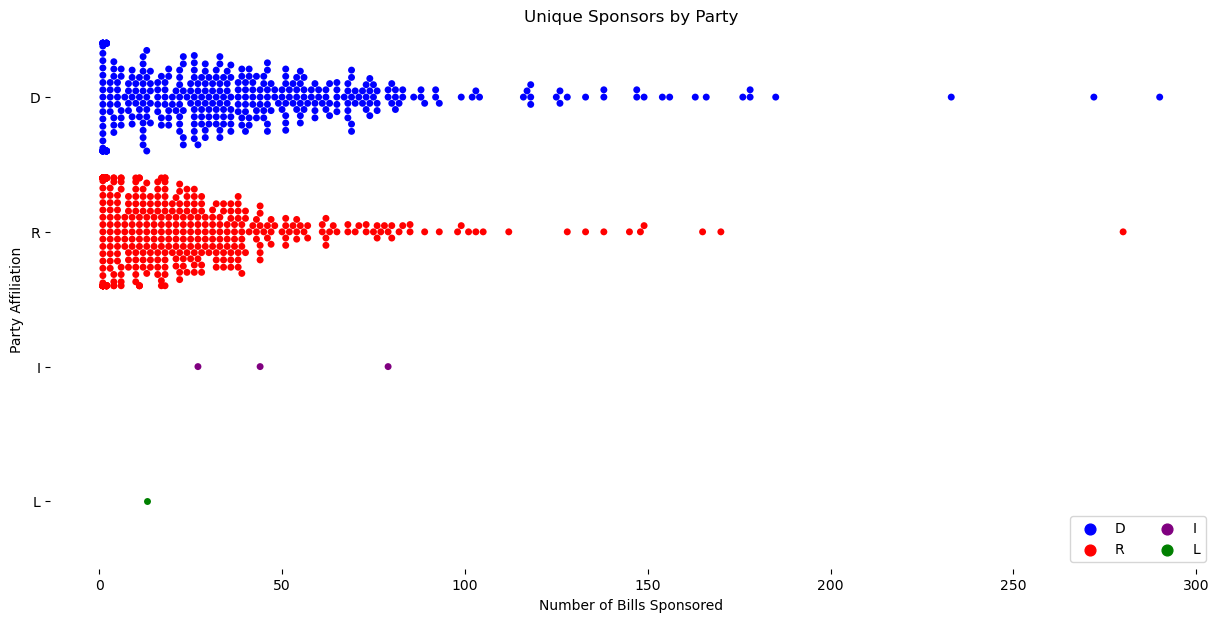

In [177]:

pal = {"R" : "red",
      "D" : "blue",
      "L" : "green",
      "I" : "purple"}

plt.figure(figsize=(15,7))
ax = sns.swarmplot(data = df_sponsors, x = 'bill_sponsored', 
            y = 'party_aff', hue = 'party_aff', palette = pal, 
                   )


ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="Party Affiliation",
       xlabel="Number of Bills Sponsored", title = 'Unique Sponsors by Party')
sns.despine(left=True, bottom=True)


plt.show()



In [178]:
df_sponsors.head(42).to_csv("sponsors_top.csv")